In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import cv2

from glob import glob
import os

(24, 72)

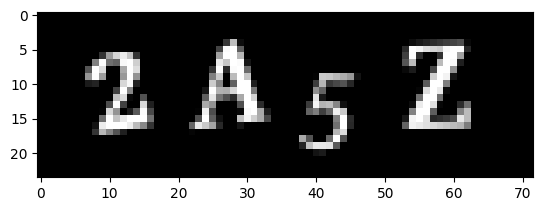

In [3]:
im = cv2.imread('../../part4_Machine Learning/Noron/2_1_Correlation/train/2A5Z.png')
im = (255-cv2.cvtColor(im,cv2.COLOR_RGB2GRAY))/255
plt.imshow(im,'gray');
im.shape


In [4]:
def load_data(p):
    pattern= os.path.join(p,'*.png')
    fills= glob(pattern)
    x = []
    y = []
    for file in fills:
        char = list(os.path.splitext(os.path.basename(file))[0])
        if len(char)!=4:
            continue
        im = cv2.imread(file)
        im = (255-cv2.cvtColor(im,cv2.COLOR_RGB2GRAY))/255
        x.append(im)
        y.append(char)
    X = np.array(x)
    Y = np.array(y)
    return X,Y

In [5]:
x,y = load_data('../../part4_Machine Learning/Noron/2_1_Correlation/train/')

In [6]:
x_train,y_train = load_data('../../part4_Machine Learning/Noron/2_1_Correlation/train/')
x_test,y_test = load_data('../../part4_Machine Learning/Noron/2_1_Correlation/test/')

In [7]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(9843, 24, 72) (9843, 4)
(100, 24, 72) (100, 4)


In [8]:
encoder= LabelEncoder()
encoder.fit(y_train.reshape(-1))
encoder.classes_

with open('encoder.bin','wb')as f:
    pickle.dump(encoder,f)

In [9]:
y_encoded_train = encoder.transform(y_train.reshape(-1)).reshape(-1,4)
y_encoded_test = encoder.transform(y_test.reshape(-1)).reshape(-1,4)
print(y_encoded_train.shape)

(9843, 4)


In [10]:
yt = to_categorical(y_encoded_train[:,0])
yt_test = to_categorical(y_encoded_test[:,0])
print(yt.shape)
yt

(9843, 32)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [11]:
def lnn(x,y,x_test,yt_test):
    model= Sequential()

    model.add(Input(shape=(24,72,1)))

    model.add(Conv2D(4,(3,3),padding='same'))
    model.add(Conv2D(8,(3,3),padding='same'))
    model.add(Conv2D(16,(3,3),padding='same'))

    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))

    model.add(Dense(32,activation='softmax'))

    model.summary()
    model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
    res= model.fit(x,y,validation_data=(x_test,yt_test),epochs=5)
    return model ,res
    

In [12]:
def chart(res):
    plt.figure(figsize=(15,5))


    plt.subplot(1, 2, 1)
    plt.plot(res.history['accuracy'])
    plt.plot(res.history['val_accuracy'])
    plt.legend(['train', 'test'])

    plt.subplot(1, 2, 2)
    plt.plot(res.history['loss'])
    plt.plot(res.history['val_loss'])
    plt.legend(['train', 'test'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 72, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 72, 8)         296       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 72, 16)        1168      
                                                                 
 flatten (Flatten)           (None, 27648)             0         
                                                                 
 dense (Dense)               (None, 256)               7078144   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4

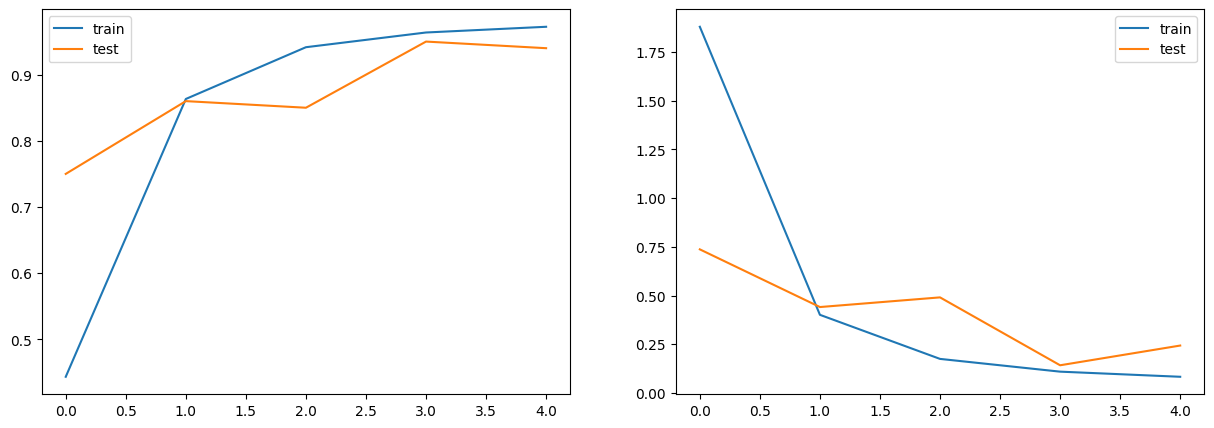

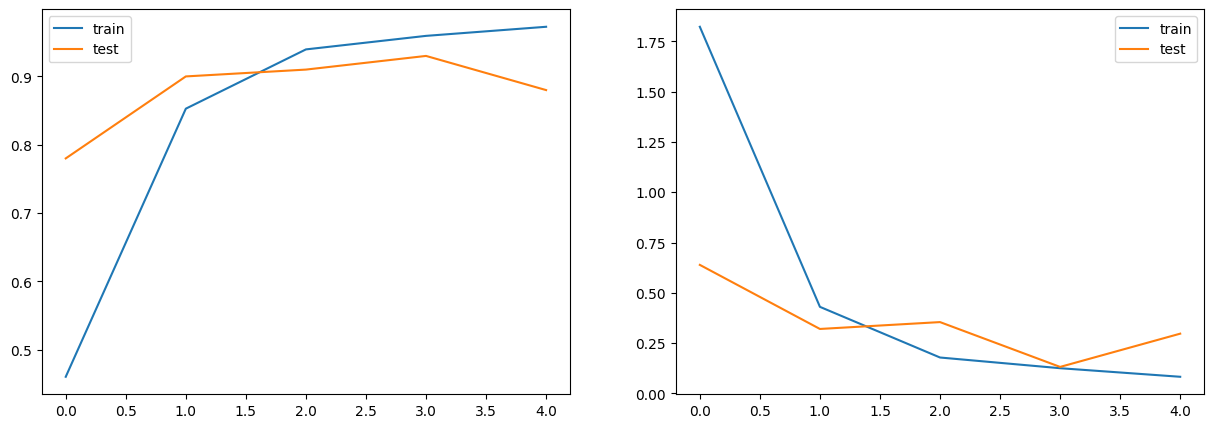

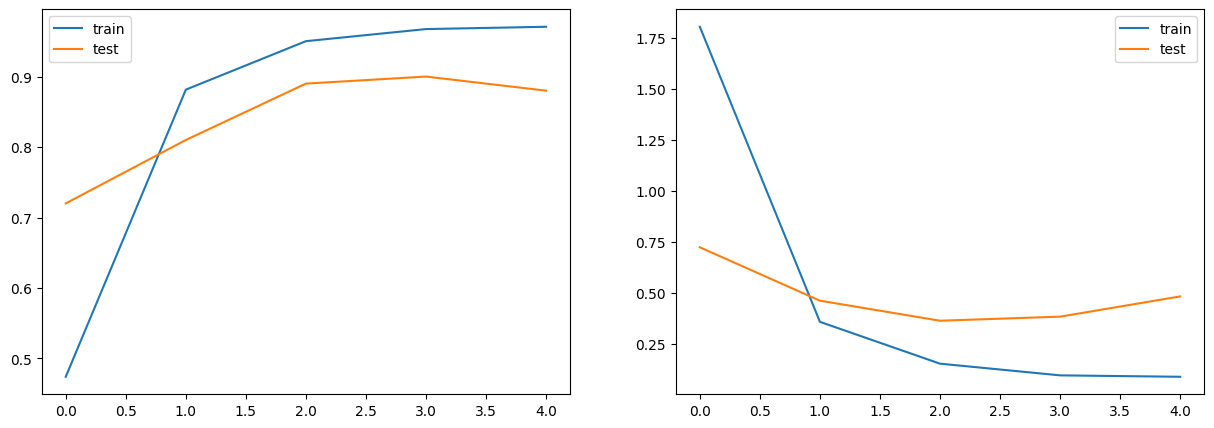

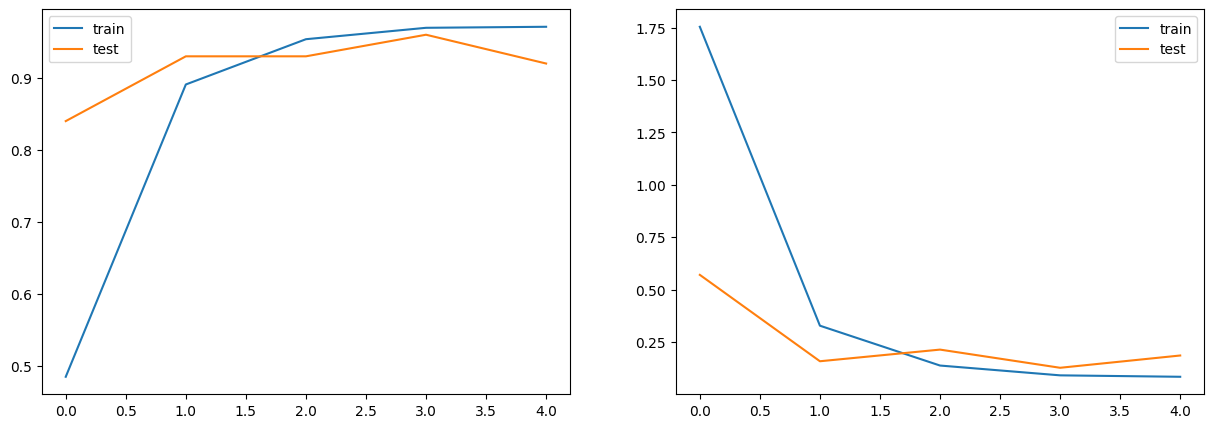

In [13]:
models = []
for i in range(0,4):
    yt = to_categorical(y_encoded_train[:,i])
    yt_test = to_categorical(y_encoded_test[:,i])
    model ,res = lnn(x_train,yt,x_test,yt_test)
    chart(res)
    models.append(model)

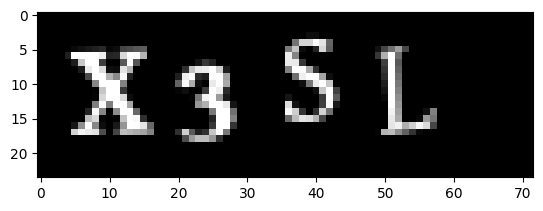

In [14]:
f = '../../part4_Machine Learning/Noron/2_1_Correlation/test/X3SL.png'
im = cv2.imread(f)
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = (255-im)/255
plt.imshow(im,'gray');

In [15]:
for i in range(4):
    r = models[i].predict(im.reshape(1,24,72,1))
    print(encoder.inverse_transform([np.argmax(r)]))

1/1 [==============================] - 0s 224ms/step
['X']
1/1 [==============================] - 0s 103ms/step
['3']
1/1 [==============================] - 0s 99ms/step
['S']
1/1 [==============================] - 0s 98ms/step
['L']


In [16]:
for i in range(4):
    models[i].save(f'model_{i}.h5')